Combine the component files for the mirrors to create an intermediate, all-telescope throughput.

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [2]:
mirrorComponents = '../components/telescope/'
intermediateDir = '../intermediateFiles/components'

m1ReflectanceFile = os.path.join(mirrorComponents, 'mirror1/m1_ProtAl_Ideal.dat')
m1LossFile = os.path.join(mirrorComponents, 'mirror1/m1_Losses/m1_Losses.dat')
m1File = os.path.join(intermediateDir, 'telescope/m1Throughput.dat')
m2ReflectanceFile = os.path.join(mirrorComponents, 'mirror2/m2_ProtAg_Ideal.dat')
m2LossFile = os.path.join(mirrorComponents, 'mirror2/m2_Losses/m2_Losses.dat')
m2File = os.path.join(intermediateDir, 'telescope/m2Throughput.dat')
m3ReflectanceFile = os.path.join(mirrorComponents, 'mirror3/m3_ProtAl_Ideal.dat')
m3LossFile = os.path.join(mirrorComponents, 'mirror3/m3_Losses/m3_Losses.dat')
m3File = os.path.join(intermediateDir, 'telescope/m3Throughput.dat')
telescopeFile = os.path.join(intermediateDir, 'telThroughput.dat')
componentsPlotFile = '../plots/telComponents.png'
telPlotFile = '../plots/telThroughput.png'

In [3]:
m1Ideal = np.loadtxt(m1ReflectanceFile)
m1Losses = np.loadtxt(m1LossFile)
m2Ideal = np.loadtxt(m2ReflectanceFile)
m2Losses = np.loadtxt(m2LossFile)
m3Ideal = np.loadtxt(m3ReflectanceFile)
m3Losses = np.loadtxt(m3LossFile)

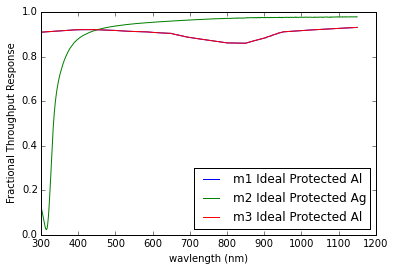

In [4]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], m1Ideal[:,1], label='m1 Ideal Protected Al')
_ = plt.plot(m2Ideal[:,0], m2Ideal[:,1], label='m2 Ideal Protected Ag')
_ = plt.plot(m3Ideal[:,0], m3Ideal[:,1], label='m3 Ideal Protected Al')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

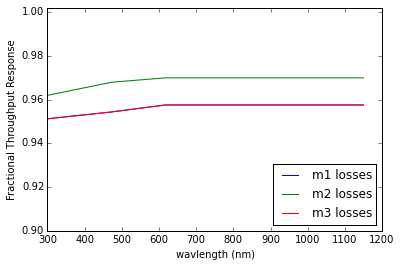

In [5]:
_ = plt.ylim([0.90, 1.002])
_ = plt.plot(m1Losses[:,0], m1Losses[:,1], label = 'm1 losses')
_ = plt.plot(m2Losses[:,0], m2Losses[:,1], label = 'm2 losses')
_ = plt.plot(m3Losses[:,0], m3Losses[:,1], label = 'm3 losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [6]:
m1Thru = m1Ideal[:,1] * m1Losses[:,1]
m2Thru = m2Ideal[:,1] * m2Losses[:,1]
m3Thru = m3Ideal[:,1] * m3Losses[:,1]
np.savetxt(m1File, zip(m1Ideal[:,0], m1Thru))
np.savetxt(m2File, zip(m2Ideal[:,0], m2Thru))
np.savetxt(m3File, zip(m3Ideal[:,0], m3Thru))

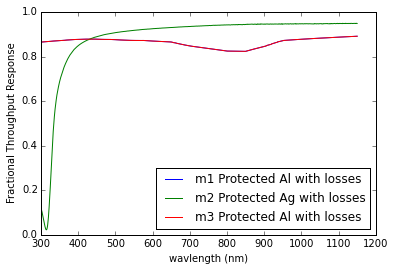

In [7]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], m1Thru, label='m1 Protected Al with losses')
_ = plt.plot(m2Ideal[:,0], m2Thru, label='m2 Protected Ag with losses')
_ = plt.plot(m3Ideal[:,0], m3Thru, label='m3 Protected Al with losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(componentsPlotFile)

In [8]:
telThru = m1Thru * m2Thru * m3Thru

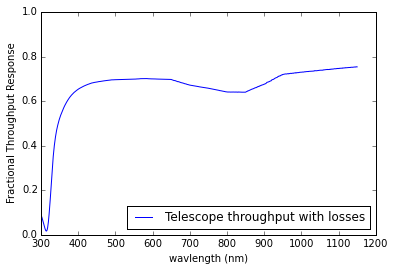

In [9]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], telThru, label='Telescope throughput with losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(telPlotFile)

In [10]:
np.savetxt(telescopeFile, zip(m1Ideal[:,0], telThru))